In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels as arima ## For Arima modeling 

In [11]:
file_path = "data\CMO-Historical-Data-Monthly.xlsx"




df = pd.read_excel(file_path, sheet_name='Monthly Prices', skiprows=4, engine='openpyxl')  
# print(df.head())



xls = pd.ExcelFile(file_path, engine='openpyxl')
# print(df.isnull().sum())
# To check for null or missing data

df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

df = df.drop([0, 1])
# Droped the names of $\bbl

df.replace('…', pd.NA, inplace=True)
# Alot of dotted values (missing) replaced with NA
df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
# df.fillna(0,inplace=True)

print(df.head(10))

# print(xls.sheet_names)
# To List all sheet names  

       Year  Crude oil, average  Crude oil, Brent  Crude oil, Dubai  \
2   1960M01                1.63              1.63              1.63   
3   1960M02                1.63              1.63              1.63   
4   1960M03                1.63              1.63              1.63   
5   1960M04                1.63              1.63              1.63   
6   1960M05                1.63              1.63              1.63   
7   1960M06                1.63              1.63              1.63   
8   1960M07                1.63              1.63              1.63   
9   1960M08                1.63              1.63              1.63   
10  1960M09                1.63              1.63              1.63   
11  1960M10                1.63              1.63              1.63   

    Crude oil, WTI  Coal, Australian  Coal, South African **  Natural gas, US  \
2             35.3               7.8                   29.34             0.14   
3             35.3               7.8                   2

C:\Users\pc\AppData\Local\Temp\ipykernel_4356\3541343255.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('…', pd.NA, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_4356\3541343255.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # backward filling the missing values of coal in Australia and South Africa
C:\Users\pc\AppData\Local\Temp\ipykernel_4356\3541343255.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_sil

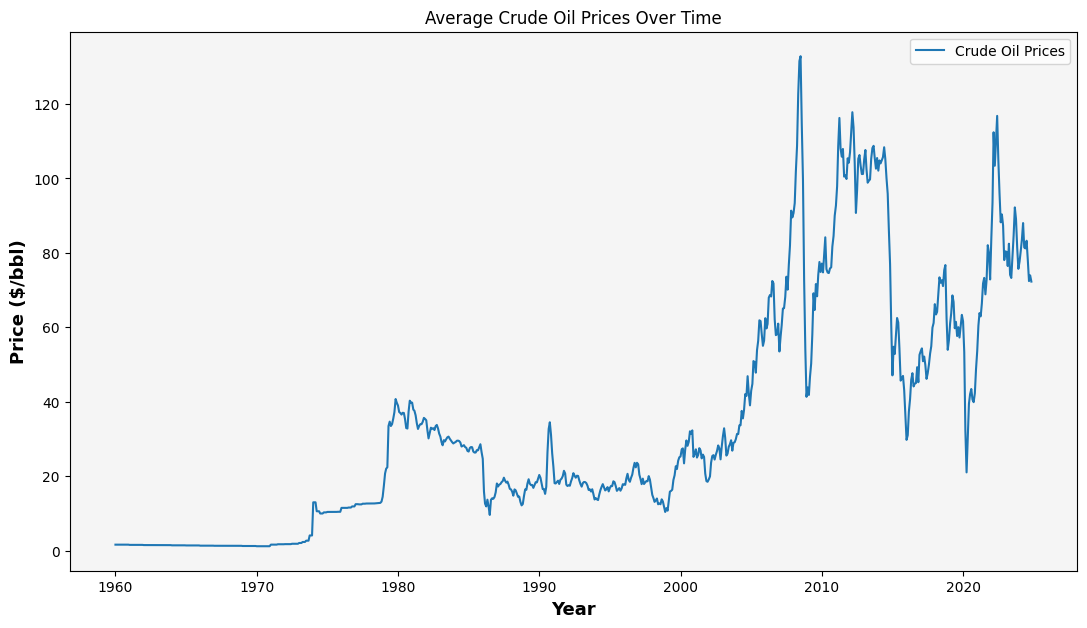

In [12]:
# print(df.columns)
# print(df.info())
df['Date'] = pd.to_datetime(df['Year'], format='%YM%m') # Convert it to time instead of just shwoing numbers
df.set_index('Date', inplace=True) # Set Date column as index
plt.figure(figsize=(13,7))
plt.plot(df['Crude oil, average'], label='Crude Oil Prices')
plt.title('Average Crude Oil Prices Over Time')
plt.xlabel('Year', fontweight = 'bold', fontsize = '13')
plt.ylabel('Price ($/bbl)', fontweight = 'bold', fontsize = '13')
plt.legend()
plt.gca().set_facecolor('whitesmoke')

In [16]:
from statsmodels.tsa.stattools import adfuller # For Augmented Dicky Fuller Test

result = adfuller(df['Crude oil, average'])

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# This basically prints the statistics such as the p value to know if stationary or not.

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# In this case the p value was above 0.05, therefore the series is not stationary

MissingDataError: exog contains inf or nans

In [14]:
df['Crude oil, average'] = df['Crude oil, average'].diff()

from statsmodels.tsa.stattools import adfuller # For Augmented Dicky Fuller Test

result = adfuller(df['Crude oil, average'].dropna())

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# This basically prints the statistics such as the p value to know if stationary or not.

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")

# In this case the p value was under 0.05, therefore the series is stationary

ADF Statistic: -12.874913291563438
p-value: 4.792077333919793e-24
Critical Values:
   1%: -3.4388489336836003
   5%: -2.865291103159288
   10%: -2.568767459327767
The series is stationary.


MissingDataError: exog contains inf or nans

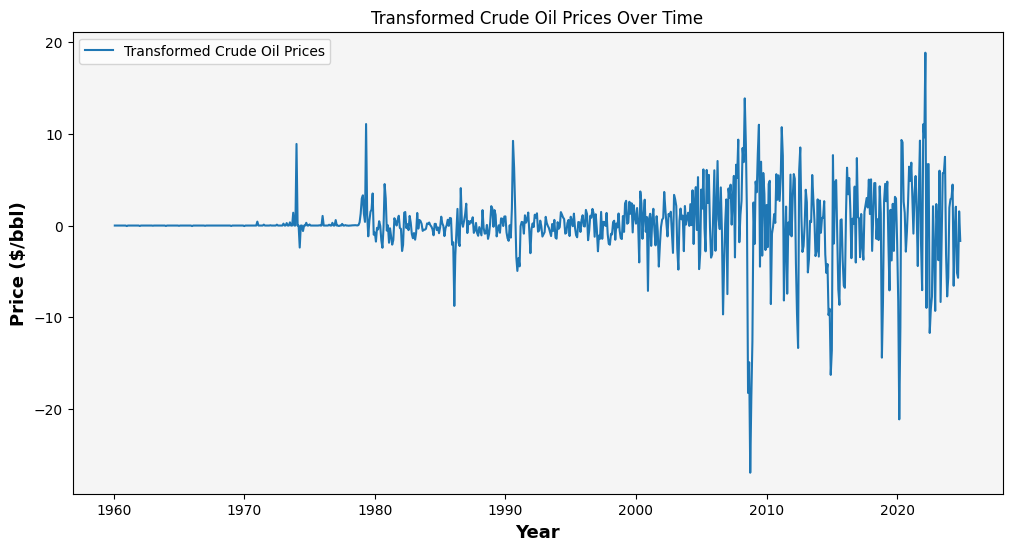

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['Crude oil, average'], label='Transformed Crude Oil Prices')
plt.title('Transformed Crude Oil Prices Over Time')
plt.xlabel('Year', fontweight = 'bold', fontsize = '13')
plt.ylabel('Price ($/bbl)', fontweight = 'bold', fontsize = '13')
plt.legend()
plt.gca().set_facecolor('whitesmoke')

# Rechecking if series is stationary after transformation

result = adfuller(df['Crude oil, average'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


Text(0.5, 1.0, 'ACF Plot')

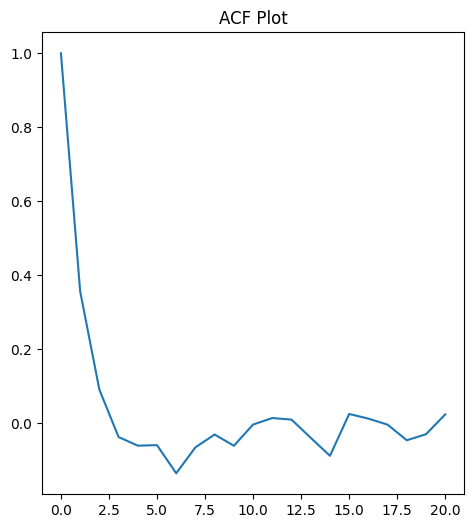

In [17]:
# ACF
    
from statsmodels.tsa.stattools import adfuller, acf, pacf
series = df['Crude oil, average'].dropna()

acf_values = acf(series, nlags=20)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf_values)
plt.title('ACF Plot')

Text(0.5, 1.0, 'PACF Plot')

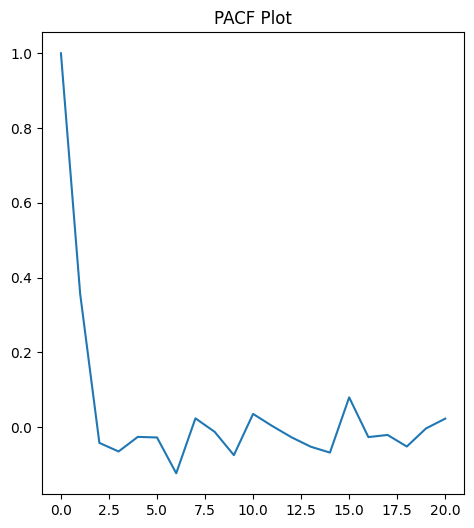

In [28]:
from statsmodels.tsa.stattools import pacf
pacf_values = pacf(series, nlags=20)
plt.figure(figsize=(12, 6))
plt.subplot(122)
plt.plot(pacf_values)
plt.title('PACF Plot')

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df['Crude oil, average'][:train_size], df['Crude oil, average'][train_size:]



c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:     Crude oil, average   No. Observations:                  623
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1532.394
Date:                Mon, 06 Jan 2025   AIC                           3068.787
Time:                        14:24:35   BIC                           3077.653
Sample:                    01-01-1960   HQIC                          3072.233
                         - 11-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4785      0.016    -30.162      0.000      -0.510      -0.447
sigma2         7.9387      0.161     49.451      0.000       7.624       8.253
Ljung-Box (L1) (Q):                   1.49   Jarque-

c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as startin

                               SARIMAX Results                                
Dep. Variable:     Crude oil, average   No. Observations:                  623
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -1454.175
Date:                Mon, 06 Jan 2025   AIC                           2926.350
Time:                        14:51:24   BIC                           2966.261
Sample:                    01-01-1960   HQIC                          2941.860
                         - 11-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1664      0.104      1.597      0.110      -0.038       0.371
ar.L1          1.0527      1.067      0.987      0.324      -1.038       3.143
ar.L2         -0.0198      1.287     -0.015      0.9

C:\Users\pc\AppData\Local\Temp\ipykernel_4356\4110700767.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]
C:\Users\pc\AppData\Local\Temp\ipykernel_4356\4110700767.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


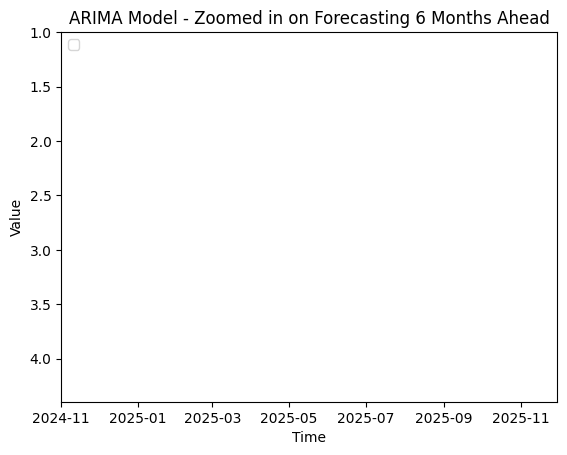

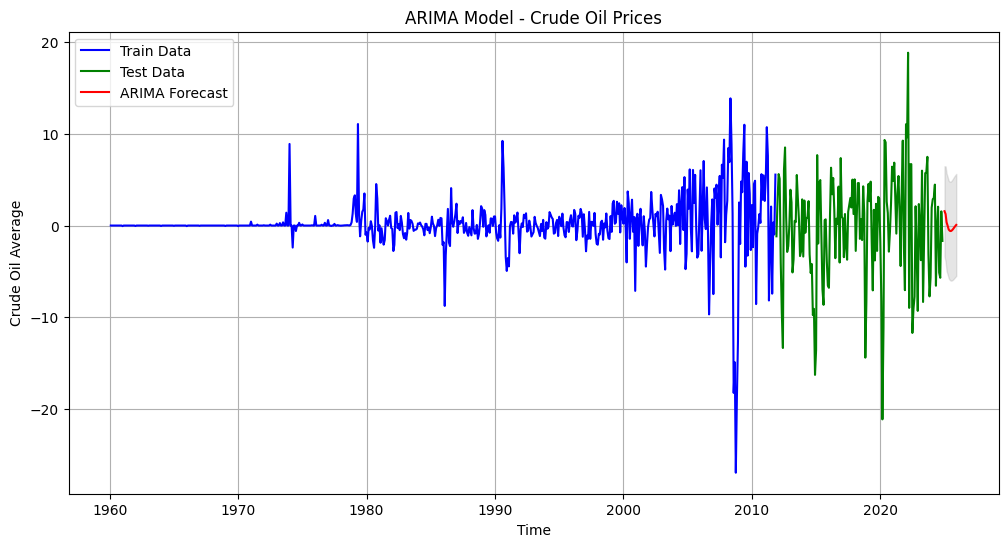

2011-12-01    1.563421
2012-01-01    1.254342
2012-02-01    0.354065
2012-03-01   -0.031620
2012-04-01   -0.440548
2012-05-01   -0.575607
2012-06-01   -0.605316
2012-07-01   -0.523074
2012-08-01   -0.388356
2012-09-01   -0.226754
2012-10-01   -0.069042
2012-11-01    0.068276
Freq: MS, Name: predicted_mean, dtype: float64
DatetimeIndex(['2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30'],
              dtype='datetime64[ns]', freq='ME')


In [482]:

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(train, order=(5, 0, 2))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

# Forecast
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Generate forecast index
last_date = test.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='M')[1:]

plt.xlim(test.index[-1], forecast_index[-1]) 
plt.ylim(min(forecast_mean.min(), test.max()) + 5)
plt.plot(test.index[-1],forecast_index[-1])
plt.legend(loc='upper left')
plt.title('ARIMA Model - Zoomed in on Forecasting 6 Months Ahead')
plt.xlabel('Time')
plt.ylabel('Value')


# Plot
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data', color='blue')
plt.plot(test.index, test, label='Test Data', color='green')
plt.plot(forecast_index, forecast_mean, label='ARIMA Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)  # Confidence interval
plt.legend(loc='upper left')
plt.title('ARIMA Model - Crude Oil Prices')
plt.xlabel('Time')
plt.ylabel('Crude Oil Average')
plt.grid()
plt.show()

# Print forecasted values and index
print(forecast_mean)
print(forecast_index)



In [483]:
print("Forecasted Mean Values:")
print(forecast_mean)

print("\nForecast Index (Dates):")
print(forecast_index)

Forecasted Mean Values:
2011-12-01    1.563421
2012-01-01    1.254342
2012-02-01    0.354065
2012-03-01   -0.031620
2012-04-01   -0.440548
2012-05-01   -0.575607
2012-06-01   -0.605316
2012-07-01   -0.523074
2012-08-01   -0.388356
2012-09-01   -0.226754
2012-10-01   -0.069042
2012-11-01    0.068276
Freq: MS, Name: predicted_mean, dtype: float64

Forecast Index (Dates):
DatetimeIndex(['2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30'],
              dtype='datetime64[ns]', freq='ME')


In [484]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Sarima Model

sarima_model = SARIMAX(df['Crude oil, average'], 
                       order=(1, 0, 0), 
                       seasonal_order=(1, 0, 1, 24))  
sarima_result = sarima_model.fit()
print(sarima_result.summary())

c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                   Crude oil, average   No. Observations:                  779
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 24)   Log Likelihood               -2052.113
Date:                              Mon, 06 Jan 2025   AIC                           4112.226
Time:                                      14:51:25   BIC                           4130.858
Sample:                                  01-01-1960   HQIC                          4119.393
                                       - 11-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3607      0.015     24.028      0.000       0.331       0.390
ar.S.L24      -0.01

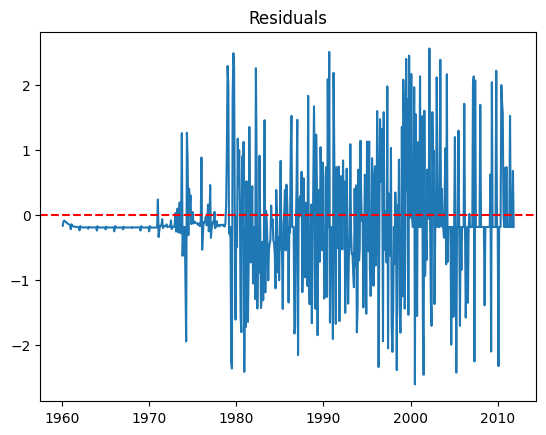

In [485]:
plt.plot(residuals)
plt.title('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [486]:
threshold = 3 * residuals.std()  
outliers = residuals[np.abs(residuals) > threshold]
print("Outlier indices:", outliers.index)


Outlier indices: DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [487]:
residuals[outliers.index] = residuals.median()

df_cleaned = df.drop(outliers.index, axis=0)




In [488]:
sarima_model = SARIMAX(df_cleaned['Crude oil, average'], 
                       order=(1, 0, 0), 
                       seasonal_order=(1, 0, 0, 24))  
sarima_result = sarima_model.fit()
print(sarima_result.summary())

c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\pc\OneDrive - Beirut Arab University\Desktop\Crude Oil Project\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                 Crude oil, average   No. Observations:                  779
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 24)   Log Likelihood               -2052.187
Date:                            Mon, 06 Jan 2025   AIC                           4110.375
Time:                                    14:51:26   BIC                           4124.349
Sample:                                01-01-1960   HQIC                          4115.750
                                     - 11-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3609      0.015     24.280      0.000       0.332       0.390
ar.S.L24      -0.1042      0.024   

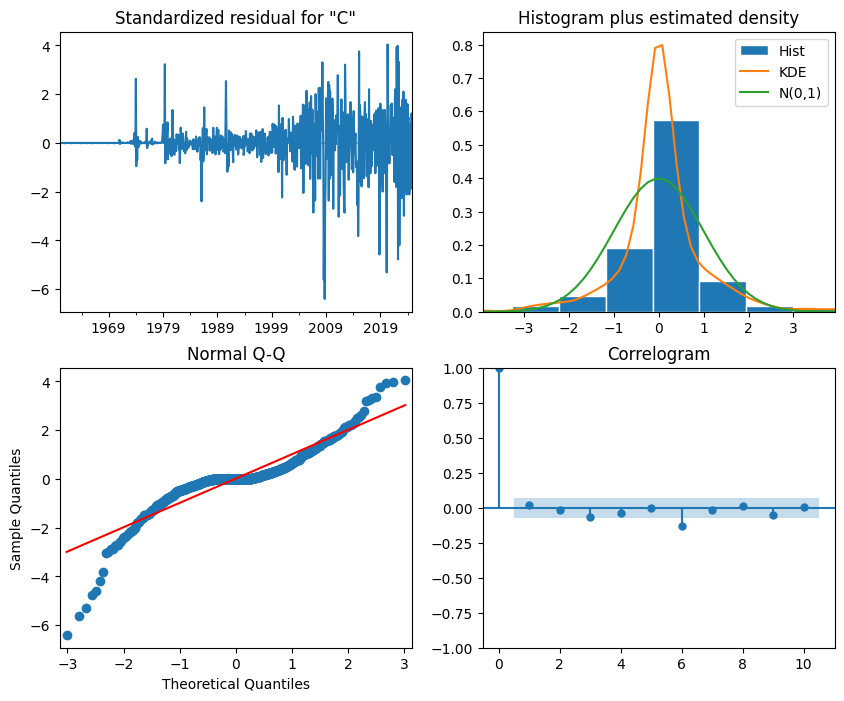

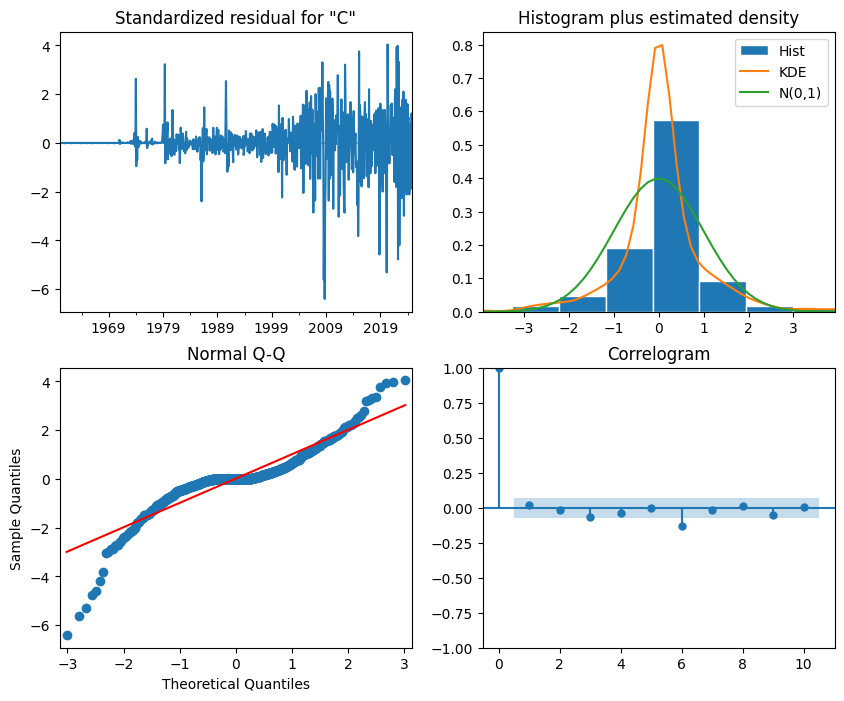

In [489]:
sarima_result.plot_diagnostics(figsize=(10, 8))

2024-11-01 00:00:00
2024-12-01    0.253218
2025-01-01   -0.503003
2025-02-01   -0.077086
2025-03-01    0.360205
2025-04-01   -0.636054
2025-05-01    0.864389
2025-06-01    0.088037
2025-07-01   -0.596666
2025-08-01   -0.598489
2025-09-01   -0.781214
2025-10-01    0.326817
2025-11-01    0.805481
Freq: MS, Name: predicted_mean, dtype: float64
DatetimeIndex(['2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31', '2025-06-30', '2025-07-31',
               '2025-08-31', '2025-09-30', '2025-10-31', '2025-11-30'],
              dtype='datetime64[ns]', freq='ME')
            Forecasted Price  Lower Bound  Upper Bound
2024-12-31               NaN          NaN          NaN
2025-01-31               NaN          NaN          NaN
2025-02-28               NaN          NaN          NaN
2025-03-31               NaN          NaN          NaN
2025-04-30               NaN          NaN          NaN
2025-05-31               NaN          NaN          NaN
2025-06-3

C:\Users\pc\AppData\Local\Temp\ipykernel_4356\571493929.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df_cleaned.index[-1], periods=forecast_steps + 1, freq='M')[1:]


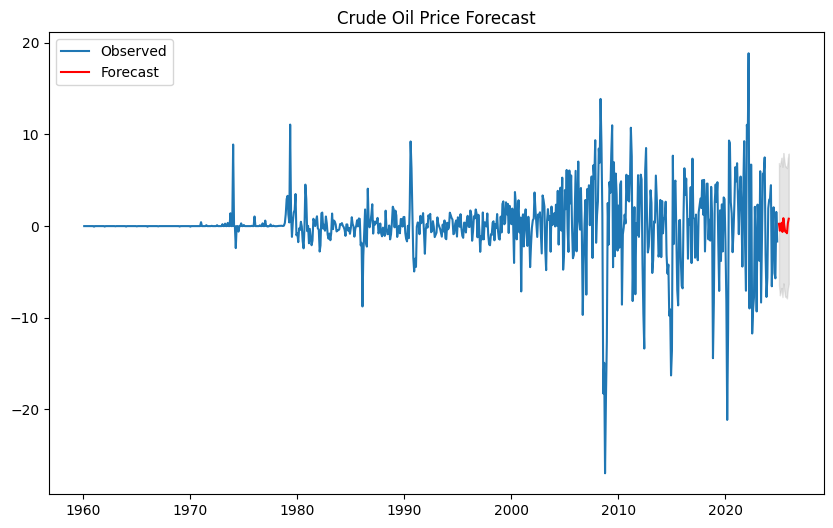

In [490]:
forecast_steps = 12  

forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

last_date = df_cleaned.index[-1]
print(last_date)



forecast_index = pd.date_range(start=df_cleaned.index[-1], periods=forecast_steps + 1, freq='M')[1:]

print(forecast_mean)
print(forecast_index)

forecast_details = pd.DataFrame({
    'Forecasted Price': forecast_mean,
    'Lower Bound': forecast_ci['lower Crude oil, average'],
    'Upper Bound': forecast_ci['upper Crude oil, average']
}, index=forecast_index)

print(forecast_details)
# forecast = sarima_result.get_forecast(steps=forecast_steps)
# print(forecast.predicted_mean)  # This should show the forecasted mean values
# print(forecast.conf_int()) 



# Plot the observed and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Crude oil, average'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title('Crude Oil Price Forecast')
plt.show()
